In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Define rewards and probabilities for each slot machine
slot_machines_rewards = {1: 3, 2: 4, 3: 1, 4: 2, 5: 7, 6: 1, 7: 8, 8: 5, 9: 7, 10: 6}
slot_machines_probability = {1: 0.3, 2: 0.4, 3: 0.1, 4: 0.2, 5: 0.7, 6: 0.15, 7: 0.8, 8: 0.5, 9: 0.65, 10: 0.6}

def random_reward(action):
    """Simulate a reward for the given action based on its probability."""
    if np.random.random() < slot_machines_probability[action]:
        return slot_machines_rewards[action]
    return 0


def k_armed_bandit(epsilon, time_steps, slot_machines_rewards, slot_machines_probability):
  # Initialize Q-values and action counts
  Q = {action: 0 for action in slot_machines_rewards.keys()}
  N = {action: 1 for action in slot_machines_rewards.keys()}

  # List to store rewards and incremental averages
  rewards = []
  incremental_averages = []

  # Epsilon-greedy algorithm
  cumulative_average = 0
  for t in range(1, time_steps + 1):
      if np.random.random() < (1 - epsilon):
          # Greedy action
          action = max(Q, key=Q.get)
      else:
          # Random action
          action = np.random.randint(1, num_actions + 1)

      # Get reward and update Q-value
      reward = random_reward(action)
      Q[action] = Q[action] + (1 / N[action]) * (reward - Q[action])
      N[action] += 1
      rewards.append(reward)

      # Incremental average calculation
      cumulative_average += (reward - cumulative_average) / t
      incremental_averages.append(cumulative_average)
  return incremental_averages

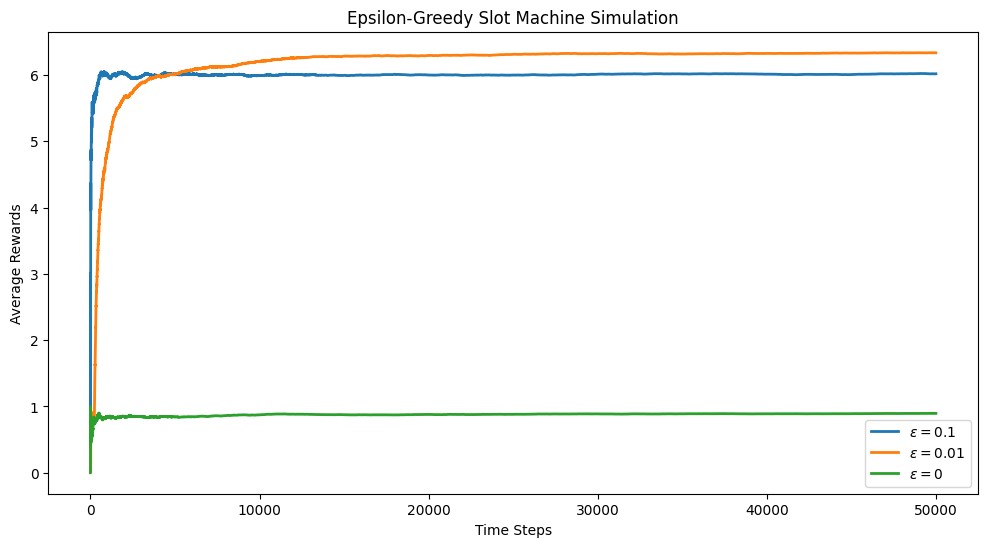

Expected Rewards for Each Slot Machine:
Slot 1: 0.90
Slot 2: 1.60
Slot 3: 0.10
Slot 4: 0.40
Slot 5: 4.90
Slot 6: 0.15
Slot 7: 6.40
Slot 8: 2.50
Slot 9: 4.55
Slot 10: 3.60

The optimal action to maximize expected return: Slot 7


In [51]:
# Hyperparameters
epsilon_1e_1 = 0.1
epsilon_1e_2 = 0.01
epsilon_0 = 0

num_actions = len(slot_machines_rewards)
time_steps = 50000


incremental_averages_with_epsilon_1e_1 = k_armed_bandit(epsilon_1e_1, time_steps, slot_machines_rewards, slot_machines_probability)
incremental_averages_with_epsilon_1e_2 = k_armed_bandit(epsilon_1e_2, time_steps, slot_machines_rewards, slot_machines_probability)
incremental_averages_with_epsilon_0 = k_armed_bandit(epsilon_0, time_steps, slot_machines_rewards, slot_machines_probability)

# Plot cumulative rewards and incremental averages over time
plt.figure(figsize=(12, 6))
plt.plot(incremental_averages_with_epsilon_1e_1, linewidth = 2, label=r'$\epsilon = 0.1$')
plt.plot(incremental_averages_with_epsilon_1e_2, linewidth = 2, label=r'$\epsilon = 0.01$')
plt.plot(incremental_averages_with_epsilon_0, linewidth = 2, label=r'$\epsilon = 0$')
plt.xlabel('Time Steps')
plt.ylabel('Average Rewards')
plt.title('Epsilon-Greedy Slot Machine Simulation')
plt.legend()
plt.show()

# Calculate expected rewards for each slot machine
expected_rewards = {action: slot_machines_rewards[action] * slot_machines_probability[action]
                    for action in slot_machines_rewards.keys()}

# Print expected rewards and optimal action
print("Expected Rewards for Each Slot Machine:")
for action, reward in expected_rewards.items():
    print(f"Slot {action}: {reward:.2f}")

optimal_action = max(expected_rewards, key=expected_rewards.get)
print(f"\nThe optimal action to maximize expected return: Slot {optimal_action}")